## Setup

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [31]:
base_path = r'..\Dataset'

gen_path_normal = os.path.join(base_path, r'Generated\normal.npy')
gen_path_patient = os.path.join(base_path, r'Generated\patient.npy')

real_path_normal = os.path.join(base_path, r'Tset\normal_cls.npy')
real_path_patient = os.path.join(base_path, r'Tset\patient_cls.npy')

gen_path_normal,gen_path_patient,real_path_normal,real_path_patient,

('..\\Dataset\\Generated\\normal.npy',
 '..\\Dataset\\Generated\\patient.npy',
 '..\\Dataset\\Tset\\normal_cls.npy',
 '..\\Dataset\\Tset\\patient_cls.npy')

In [32]:
def higuchi_fd(sig, kmax):
    """
    Compute Higuchi Fractal Dimension of a time series.

    Parameters:
        sig : numpy array
            1-D real-valued time series signal.
        kmax : int
            Maximum delay value.

    Returns:
        float
            Higuchi Fractal Dimension.
    """
    n = len(sig)
    k_vals = np.arange(1, kmax + 1)
    lk = np.zeros(kmax)

    for k in k_vals:
        num_windows = np.floor((n - np.arange(k)) / k).astype(int)
        lm = np.zeros(k)

        for m in range(k):
            indices = np.arange(m, n, k)
            diff = np.abs(np.diff(sig[indices], n=1))
            lm[m] = np.sum(diff) / (num_windows[m] * k)

        lk[k - 1] = np.mean(lm) * (n / k)**2

    return np.log(lk).sum() / np.log(np.divide(n, k_vals)).sum()

In [33]:
# Function to compute Shannon Entropy
def shannonentropy(sig, base=np.exp(1)):
    hist, _ = np.histogram(sig, bins='auto', density=True)
    hist = hist[hist > 0]
    entropy = -np.sum(hist * np.log(hist) / np.log(base))
    return entropy

In [34]:
# Function to compute Katz Fractal Dimension
def katz_fd(sig):
    d = np.abs(np.diff(sig)).sum()
    N = len(sig) - 1
    L = np.hypot(np.diff(sig), 1).sum()
    katz_dim = np.log10(N) / (np.log10(d / L) + np.log10(N))
    return katz_dim

In [35]:
from tqdm import tqdm

def create_dataset(file_path: str, dataset: list, func, classification:int, **kwargs):
    control = np.load(file_path)
    for signal in tqdm(control):
        partial_signal = []
        for channel in signal:
            partial_signal.append(func(channel, **kwargs))
        partial_signal.append(classification)
        partial_signal
        dataset.append(partial_signal)
    return dataset

In [36]:
#For classification

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print(p)
  print("Training Accuracy: " + str(accuracy_score(train_preds, train_labels)))
  print("Training Precision: " + str(precision_score(train_preds, train_labels)))
  print("Training Recall: " + str(recall_score(train_preds, train_labels)))
  print("Training F1: " + str(f1_score(train_preds, train_labels)))

  print("Test Accuracy: " + str(accuracy_score(test_preds, test_labels)))
  print("Test Precision: " + str(precision_score(test_preds, test_labels)))
  print("Test Recall: " + str(recall_score(test_preds, test_labels)))
  print("Test F1: " + str(f1_score(test_preds, test_labels)))

## Higuchi

***To use machine learning models with the actual data***

In [8]:
use_existing = False

In [9]:



if not use_existing:
    dataset_hfd = []
    create_dataset(real_path_patient, dataset_hfd, higuchi_fd, 1, kmax=6)
    create_dataset(real_path_normal, dataset_hfd, higuchi_fd, 0, kmax=6)

    dataset_hfd = np.asarray(dataset_hfd)
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])
    # np.save(r'training_data_MLProject\higuchi_real_only',dataset_hfd)
else:
    dataset_hfd = np.load(r'training_data_MLProject\higuchi_real_only.npy')
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])


100%|██████████| 100/100 [00:00<00:00, 356.63it/s]

Dataset shape: (200, 20)
[1.25204312 1.23415471 1.2273806  1.28032996 1.25610587 1.19040198
 1.1594483  1.18899358 1.25671402 1.23105399 1.24294879 1.27012203
 1.29056145 1.16576706 1.1144279  1.21352776 1.26961345 1.27372301
 1.25098469 1.        ]


**Generated Data Higuchi**

In [10]:
use_existing = False

In [11]:
generated_hfd = []
create_dataset(gen_path_patient, generated_hfd, higuchi_fd, 1, kmax=6)
create_dataset(gen_path_normal, generated_hfd, higuchi_fd, 0, kmax=6)


generated_hfd = np.asarray(generated_hfd)
print(generated_hfd[0])

100%|██████████| 4000/4000 [00:12<00:00, 319.39it/s]

[1.2684367  1.27473967 1.26978025 1.24532894 1.26692228 1.23678281
 1.22476234 1.21443278 1.26484441 1.25798494 1.23621586 1.26155053
 1.25342695 1.20846394 1.18973197 1.22729093 1.29363286 1.25638315
 1.26535955 1.        ]


In [12]:
X = dataset_hfd[:, :-1]
y = dataset_hfd[:, -1]

X_test_hfd, y_test_hfd = X, y

In [13]:
X = generated_hfd[:, :-1]
y = generated_hfd[:, -1]

X_train_hfd, y_train_hfd = X, y

In [14]:
X_train_hfd.shape, X_test_hfd.shape, y_train_hfd.shape, y_test_hfd.shape

((8000, 19), (200, 19), (8000,), (200,))

### Logistic Regression

In [15]:
# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
# lr_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(lr_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

LogisticRegression()
Training Accuracy: 0.90125
Training Precision: 0.9345
Training Recall: 0.8762306610407876
Training F1: 0.9044277764335834
Test Accuracy: 0.82
Test Precision: 0.89
Test Recall: 0.7807017543859649
Test F1: 0.8317757009345794


### Random Forest

In [16]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
# rf_classifier.fit(X_train_hfd, y_train_hfd)

fit_and_print(rf_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.892875
Training Precision: 0.97425
Training Recall: 0.8378843259514083
Training F1: 0.9009363079412784
Test Accuracy: 0.71
Test Precision: 0.74
Test Recall: 0.6981132075471698
Test F1: 0.7184466019417476


In [17]:
rf_classifier.feature_importances_

array([0.05259428, 0.04942768, 0.02329269, 0.04167278, 0.06668498,
       0.05828157, 0.12581881, 0.0250884 , 0.14440596, 0.07751577,
       0.03676683, 0.03715697, 0.07739887, 0.01143426, 0.02539146,
       0.03886676, 0.02425994, 0.05764679, 0.02629519])

### Decision Tree

In [18]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(dt_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.785
Test Precision: 0.71
Test Recall: 0.8352941176470589
Test F1: 0.7675675675675676


### Naive Bayes

In [19]:
# Initialize the Naïve Bayes Classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
# nb_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(nb_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

GaussianNB()
Training Accuracy: 0.6445
Training Precision: 0.8105
Training Recall: 0.6084834834834835
Training F1: 0.6951114922813036
Test Accuracy: 0.745
Test Precision: 0.77
Test Recall: 0.7333333333333333
Test F1: 0.751219512195122


### SVM

In [20]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(poly_kernel_svm_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.99025
Training Precision: 0.99025
Training Recall: 0.99025
Training F1: 0.99025
Test Accuracy: 0.855
Test Precision: 0.91
Test Recall: 0.8198198198198198
Test F1: 0.8625592417061612


In [21]:
from sklearn.metrics import confusion_matrix
y_pred = dt_classifier.predict(X_test_hfd)
conf_mat = confusion_matrix(y_test_hfd, y_pred)

In [22]:
print(conf_mat)

[[86 14]
 [29 71]]


In [23]:
y_test_hfd

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

***SVM - using Regularization***

In [24]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.988125
Training Precision: 0.98725
Training Recall: 0.9889807162534435
Training F1: 0.9881146002752408
Test Accuracy: 0.86
Test Precision: 0.9
Test Recall: 0.8333333333333334
Test F1: 0.8653846153846154


In [25]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized2, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.988875
Training Precision: 0.98875
Training Recall: 0.9889972493123281
Training F1: 0.9888736092011502
Test Accuracy: 0.86
Test Precision: 0.9
Test Recall: 0.8333333333333334
Test F1: 0.8653846153846154


### K Nearest Neighbors

In [26]:
knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(knn_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.995125
Training Precision: 0.99675
Training Recall: 0.99352105656616
Training F1: 0.9951329090228379
Test Accuracy: 0.835
Test Precision: 0.84
Test Recall: 0.8316831683168316
Test F1: 0.835820895522388


### Ensemble

In [27]:
#should update all the models here
voting_clf = VotingClassifier(
    estimators=[('lr', lr_classifier),('rf', rf_classifier), ('dt',dt_classifier), ('nb', nb_classifier), ('svm', poly_kernel_svm_clf), ('svc', poly_kernel_svm_clf_regularized), ('svc2', poly_kernel_svm_clf_regularized2), ('knn', knn_clf)],
    voting='soft')

fit_and_print(voting_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [28]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = lr_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(y_test_hfd, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = rf_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(y_test_hfd, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Get predicted probabilities for the positive class
dt_probs = dt_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(y_test_hfd, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)



# Get predicted probabilities for the positive class
nb_probs = nb_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(y_test_hfd, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)



# Get predicted probabilities for the positive class
svm_probs = poly_kernel_svm_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(y_test_hfd, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = poly_kernel_svm_clf_regularized.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(y_test_hfd, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = poly_kernel_svm_clf_regularized2.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(y_test_hfd, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = knn_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(y_test_hfd, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)



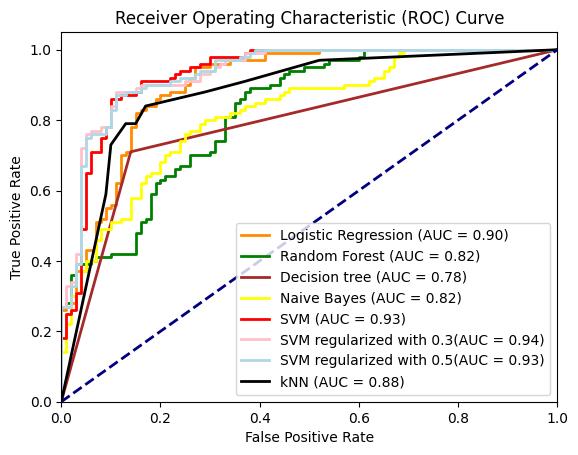

In [29]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with 0.3(AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with 0.5(AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## ***Entropy***

**Real Data**

In [30]:

dataset_ent = []
create_dataset(real_path_patient, dataset_ent, shannonentropy, 1)
create_dataset(real_path_normal, dataset_ent, shannonentropy, 0)


dataset_ent = np.asarray(dataset_ent)
print(dataset_ent[0], '\n', dataset_ent.shape)
# np.save(r'training_data_MLProject\ent_real_only.npy', dataset_ent)



100%|██████████| 100/100 [00:00<00:00, 583.76it/s]

[  1.30809826  -6.77518012 -14.14869685 -12.66840769 -25.57775532
 -13.73376831 -51.5198323  -26.77101025   1.46668473 -12.09119717
 -17.39382907 -10.82602134 -23.6570374  -20.33135593 -64.75349863
 -34.1815934   -7.06018332  -7.22123639 -13.07970574   1.        ] 
 (200, 20)


**Generated Data**

In [31]:
use_existing = False

In [32]:

generated_ent = []
create_dataset(gen_path_patient, generated_ent, shannonentropy, 1)
create_dataset(gen_path_normal, generated_ent, shannonentropy, 0)


generated_ent = np.asarray(generated_ent)
print(generated_ent[0], '\n', generated_ent.shape)




100%|██████████| 500/500 [00:00<00:00, 515.56it/s]

[-28.88022362 -18.07479509 -20.73479984 -22.50819415 -19.31334713
 -40.59864015 -46.2484201  -32.4619597  -28.09641336 -24.11510824
 -17.44647033 -12.49547646 -13.85437917 -42.21729792 -30.89831633
 -19.50028154 -16.53170637 -15.71012381 -22.65017616   1.        ] 
 (1000, 20)


In [33]:
# # Extract features (X) and output variable (y)
# X1 = dataset_ent[:, :-1]
# y1 = dataset_ent[:, -1]

# # Split the data into training and testing sets
# X_train_ent, X_test_ent = X1[train_indices], X1[test_indices]
# y_train_ent, y_test_ent = y1[train_indices], y1[test_indices]
X_train_ent, y_train_ent = generated_ent[:, :-1], generated_ent[:, -1]
X_test_ent, y_test_ent = dataset_ent[:, :-1], dataset_ent[:, -1]

In [34]:
X_train_ent.shape, y_train_ent.shape, X_test_ent.shape, y_test_ent.shape

((1000, 19), (1000,), (200, 19), (200,))

### Random Forest

In [35]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.934
Training Precision: 0.97
Training Recall: 0.9048507462686567
Training F1: 0.9362934362934363
Test Accuracy: 0.75
Test Precision: 0.81
Test Recall: 0.7232142857142857
Test F1: 0.7641509433962265


**Feature Importances**

In [36]:
ent_rf_classifier.feature_importances_

array([0.08842524, 0.02637767, 0.04184827, 0.05793946, 0.0991429 ,
       0.07062566, 0.0180256 , 0.06453323, 0.12319764, 0.01596499,
       0.04944149, 0.07068857, 0.07158131, 0.01884471, 0.03235637,
       0.07293288, 0.01180664, 0.03774565, 0.02852173])

### Feature Selection

In [37]:
print(features_importance := ent_rf_classifier.feature_importances_)

# Threshold
threshold = 0.0

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

[0.08842524 0.02637767 0.04184827 0.05793946 0.0991429  0.07062566
 0.0180256  0.06453323 0.12319764 0.01596499 0.04944149 0.07068857
 0.07158131 0.01884471 0.03235637 0.07293288 0.01180664 0.03774565
 0.02852173]


In [38]:
print(indexes)
# X_train_ent, X_test_ent = X_train_ent[:, indexes], X_test_ent[:, indexes]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


### Random Forest Classifier

In [39]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.934
Training Precision: 0.966
Training Recall: 0.9078947368421053
Training F1: 0.936046511627907
Test Accuracy: 0.765
Test Precision: 0.83
Test Recall: 0.7345132743362832
Test F1: 0.7793427230046949


### Logistic Regression

In [40]:
# Initialize the Logistic Regression Classifier
ent_lr_classifier = LogisticRegression()

# Train the classifier on the training data
# ent_lr_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_lr_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

LogisticRegression()
Training Accuracy: 0.899
Training Precision: 0.898
Training Recall: 0.8997995991983968
Training F1: 0.8988988988988988
Test Accuracy: 0.77
Test Precision: 0.82
Test Recall: 0.7454545454545455
Test F1: 0.780952380952381


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [41]:
# Initialize the Decision Tree Classifier
ent_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# ent_dt_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_dt_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.695
Test Precision: 0.74
Test Recall: 0.6788990825688074
Test F1: 0.7081339712918661


### Naive Bayes

In [42]:
# Initialize the Naïve Bayes Classifier
ent_nb_classifier = GaussianNB()

# Train the classifier on the training data
# ent_nb_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_nb_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

GaussianNB()
Training Accuracy: 0.663
Training Precision: 0.846
Training Recall: 0.6193265007320644
Training F1: 0.7151310228233305
Test Accuracy: 0.67
Test Precision: 0.86
Test Recall: 0.6231884057971014
Test F1: 0.7226890756302521


### SVM

In [43]:
ent_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(ent_poly_kernel_svm_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.942
Training Precision: 0.954
Training Recall: 0.931640625
Training F1: 0.9426877470355731
Test Accuracy: 0.8
Test Precision: 0.86
Test Recall: 0.7678571428571429
Test F1: 0.8113207547169812


In [44]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.925
Training Precision: 0.95
Training Recall: 0.9047619047619048
Training F1: 0.926829268292683
Test Accuracy: 0.79
Test Precision: 0.85
Test Recall: 0.7589285714285714
Test F1: 0.8018867924528302


In [45]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized2, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.933
Training Precision: 0.956
Training Recall: 0.9139579349904398
Training F1: 0.9345063538611925
Test Accuracy: 0.795
Test Precision: 0.86
Test Recall: 0.7610619469026548
Test F1: 0.8075117370892019


### K Nearest Neighbors

In [46]:
ent_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=7))
    ])

fit_and_print(ent_knn_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=7))])
Training Accuracy: 0.957
Training Precision: 0.968
Training Recall: 0.9471624266144814
Training F1: 0.9574678536102869
Test Accuracy: 0.76
Test Precision: 0.75
Test Recall: 0.7653061224489796
Test F1: 0.7575757575757576


In [47]:
#should add all the models reference here
ent_voting_clf = VotingClassifier(
    estimators=[('lr', ent_lr_classifier),('rf', ent_rf_classifier), ('dt',ent_dt_classifier), ('nb', ent_nb_classifier),('svm', ent_poly_kernel_svm_clf), ('svc', ent_poly_kernel_svm_clf_regularized), ('svc2', ent_poly_kernel_svm_clf_regularized2), ('knn', ent_knn_clf)],
    voting='soft')

fit_and_print(ent_voting_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [48]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
ent_lr_probs = ent_lr_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_lr, ent_tpr_lr, _ = roc_curve(y_test_ent, ent_lr_probs)

# Calculate AUC
ent_roc_auc_lr = auc(ent_fpr_lr, ent_tpr_lr)


# Get predicted probabilities for the positive class
ent_rf_probs = ent_rf_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_rf, ent_tpr_rf, _ = roc_curve(y_test_ent, ent_rf_probs)

# Calculate AUC
ent_roc_auc_rf = auc(ent_fpr_rf, ent_tpr_rf)


# Get predicted probabilities for the positive class
ent_dt_probs = ent_dt_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_dt, ent_tpr_dt, _ = roc_curve(y_test_ent, ent_dt_probs)

# Calculate AUC
ent_roc_auc_dt = auc(ent_fpr_dt, ent_tpr_dt)


# Get predicted probabilities for the positive class
ent_nb_probs = ent_nb_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_nb, ent_tpr_nb, _ = roc_curve(y_test_ent, ent_nb_probs)

# Calculate AUC
ent_roc_auc_nb = auc(ent_fpr_nb, ent_tpr_nb)



# Get predicted probabilities for the positive class
ent_svm_probs = ent_poly_kernel_svm_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm, ent_tpr_svm, _ = roc_curve(y_test_ent, ent_svm_probs)

# Calculate AUC
ent_roc_auc_svm = auc(ent_fpr_svm, ent_tpr_svm)




# Get predicted probabilities for the positive class
ent_svm_probs2 = ent_poly_kernel_svm_clf_regularized2.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm2, ent_tpr_svm2, _ = roc_curve(y_test_ent, ent_svm_probs2)

# Calculate AUC
ent_roc_auc_svm2 = auc(ent_fpr_svm2, ent_tpr_svm2)




# Get predicted probabilities for the positive class
ent_svm_probs3 = ent_poly_kernel_svm_clf_regularized.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm3, ent_tpr_svm3, _ = roc_curve(y_test_ent, ent_svm_probs3)

# Calculate AUC
ent_roc_auc_svm3 = auc(ent_fpr_svm3, ent_tpr_svm3)



# Get predicted probabilities for the positive class
ent_knn_probs = ent_knn_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_knn, ent_tpr_knn, _ = roc_curve(y_test_ent, ent_knn_probs)

# Calculate AUC
ent_roc_auc_knn = auc(ent_fpr_knn, ent_tpr_knn)


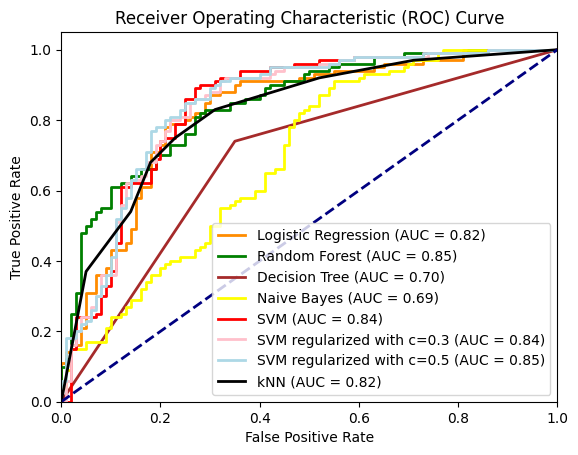

In [49]:
# Plot ROC curve
plt.figure()
plt.plot(ent_fpr_lr, ent_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % ent_roc_auc_lr)
plt.plot(ent_fpr_rf, ent_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % ent_roc_auc_rf)
plt.plot(ent_fpr_dt, ent_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % ent_roc_auc_dt)
plt.plot(ent_fpr_nb, ent_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % ent_roc_auc_nb)
plt.plot(ent_fpr_svm, ent_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % ent_roc_auc_svm)
plt.plot(ent_fpr_svm2, ent_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3 (AUC = %0.2f)' % ent_roc_auc_svm2)
plt.plot(ent_fpr_svm3, ent_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % ent_roc_auc_svm3)
plt.plot(ent_fpr_knn, ent_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % ent_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Kats Fractal Dimension

**Real Dataset**

In [50]:
use_existing = False

In [51]:
dataset_kfd = []
create_dataset(real_path_patient, dataset_kfd, katz_fd, 1)
create_dataset(real_path_normal, dataset_kfd, katz_fd, 0)


dataset_kfd = np.asarray(dataset_kfd)
print(dataset_kfd[0], '\n', dataset_kfd.shape) 

100%|██████████| 100/100 [00:00<00:00, 5882.04it/s]

[2.51177713 2.58271681 2.62428969 2.35137659 2.42291484 2.82505175
 3.02676069 2.81244791 2.49591705 2.60809178 2.54567619 2.39014643
 2.20851697 3.0179364  3.39581018 2.62121422 2.39043137 2.40541013
 2.51451584 1.        ] 
 (200, 20)


**Generated Data**

In [52]:
generated_kfd = []
create_dataset(gen_path_patient, generated_kfd, katz_fd, 1)
create_dataset(gen_path_normal, generated_kfd, katz_fd, 0)


generated_kfd = np.asarray(generated_kfd)
print(generated_kfd[0], '\n', generated_kfd.shape)

100%|██████████| 500/500 [00:00<00:00, 6368.81it/s]

[2.32373611 2.3482338  2.36108395 2.38746189 2.2718457  2.56224285
 2.56657937 2.37894643 2.35612713 2.3625965  2.29029724 2.18087667
 2.16223839 2.52918313 2.39000087 2.37614471 2.31407715 2.28698696
 2.38178585 1.        ] 
 (1000, 20)


In [53]:
print("Dataset: ", dataset_kfd.min(), dataset_kfd.max(), dataset_kfd.mean(), dataset_kfd.std(), 
      "\nGenerated:", generated_kfd.min(), generated_kfd.max(), generated_kfd.mean(), generated_kfd.std())

Dataset:  0.0 4.251078664050918 2.3540237980700867 0.592688060062901 
Generated: 0.0 3.728257574581668 2.3233167601324185 0.540635273291606


In [54]:
X_train_kfd, y_train_kfd = generated_kfd[:, :-1], generated_kfd[:, -1]
X_test_kfd, y_test_kfd = dataset_kfd[:, :-1], dataset_kfd[:, -1]

In [55]:
# X2 = dataset_kfd[:, :-1]
# y2 = dataset_kfd[:, -1]

# num_samples = len(y2)
# train_size = int(0.8 * num_samples)  # 80% for training, 20% for testing

# # Randomly select indices for training and testing
# indices = np.arange(num_samples)
# np.random.shuffle(indices)

# train_indices = indices[:train_size]
# test_indices = indices[train_size:]
# # Extract features (X) and output variable (y)

# # Split the data into training and testing sets
# X_train_kfd, X_test_kfd = X2[train_indices], X2[test_indices]
# y_train_kfd, y_test_kfd = y2[train_indices], y2[test_indices]


### Random Forest 

In [56]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.934
Training Precision: 0.992
Training Recall: 0.8888888888888888
Training F1: 0.9376181474480151
Test Accuracy: 0.715
Test Precision: 0.72
Test Recall: 0.7128712871287128
Test F1: 0.7164179104477612


### Feature Selection

In [57]:
print(features_importance := kfd_rf_classifier.feature_importances_)

[0.03092646 0.01349207 0.02085191 0.04202823 0.06059974 0.05410298
 0.12172748 0.0155625  0.15628376 0.04436966 0.03517182 0.04183352
 0.0616158  0.05212791 0.07005848 0.0612985  0.01065423 0.07367582
 0.03361912]


In [58]:
# values = [0.05, 0.2, 0.1, 0.15, -0.3, 0.5, 0.05]

# Threshold
threshold = 0.1

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

In [59]:
indexes

[6, 8]

In [60]:
# X_train_kfd, X_test_kfd = X_train_kfd[:, indexes], X_test_kfd[:, indexes]

### Random Forest Classifier

In [61]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.942
Training Precision: 0.994
Training Recall: 0.9003623188405797
Training F1: 0.9448669201520913
Test Accuracy: 0.69
Test Precision: 0.7
Test Recall: 0.6862745098039216
Test F1: 0.693069306930693


### Logistic Regression

In [62]:
# Initialize the Logistic Regression Classifier
kfd_lr_classifier = LogisticRegression()

# Train the classifier on the  training data
kfd_lr_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_lr_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

LogisticRegression()
Training Accuracy: 0.916
Training Precision: 0.962
Training Recall: 0.8809523809523809
Training F1: 0.9196940726577438
Test Accuracy: 0.755
Test Precision: 0.8
Test Recall: 0.7339449541284404
Test F1: 0.7655502392344498


### Decision Tree

In [63]:
# Initialize the Decision Tree Classifier
kfd_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# kfd_dt_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_dt_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.585
Test Precision: 0.62
Test Recall: 0.5794392523364486
Test F1: 0.5990338164251208


### Naive Bayes

In [64]:
# Initialize the Naïve Bayes Classifier
kfd_nb_classifier = GaussianNB()

# Train the classifier on the training data
# kfd_nb_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_nb_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

GaussianNB()
Training Accuracy: 0.687
Training Precision: 0.886
Training Recall: 0.6337625178826896
Training F1: 0.7389491242702252
Test Accuracy: 0.745
Test Precision: 0.78
Test Recall: 0.7289719626168224
Test F1: 0.7536231884057971


### SVM

In [65]:
kfd_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(kfd_poly_kernel_svm_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.978
Training Precision: 0.986
Training Recall: 0.9704724409448819
Training F1: 0.9781746031746031
Test Accuracy: 0.78
Test Precision: 0.81
Test Recall: 0.7641509433962265
Test F1: 0.7864077669902912


In [66]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.966
Training Precision: 0.982
Training Recall: 0.9515503875968992
Training F1: 0.9665354330708661
Test Accuracy: 0.785
Test Precision: 0.83
Test Recall: 0.7614678899082569
Test F1: 0.7942583732057417


In [67]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized2, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.971
Training Precision: 0.982
Training Recall: 0.9608610567514677
Training F1: 0.9713155291790306
Test Accuracy: 0.775
Test Precision: 0.82
Test Recall: 0.7522935779816514
Test F1: 0.784688995215311


### K Nearest Neighbors

In [68]:
kfd_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(kfd_knn_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.988
Training Precision: 0.998
Training Recall: 0.9784313725490196
Training F1: 0.9881188118811881
Test Accuracy: 0.78
Test Precision: 0.8
Test Recall: 0.7692307692307693
Test F1: 0.7843137254901961


### Ensemble

In [69]:
# fill all the models here
kfd_voting_clf = VotingClassifier(
    estimators=[('lr', kfd_lr_classifier),('rf', kfd_rf_classifier), ('dt',kfd_dt_classifier), ('nb', kfd_nb_classifier),('svm', kfd_poly_kernel_svm_clf), ('svc', kfd_poly_kernel_svm_clf_regularized), ('svc2', kfd_poly_kernel_svm_clf_regularized2), ('knn', kfd_knn_clf)],
    voting='soft')

fit_and_print(kfd_voting_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [70]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
kfd_lr_probs = kfd_lr_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_lr, kfd_tpr_lr, _ = roc_curve(y_test_kfd, kfd_lr_probs)

# Calculate AUC
kfd_roc_auc_lr = auc(kfd_fpr_lr, kfd_tpr_lr)



# Get predicted probabilities for the positive class
kfd_rf_probs = kfd_rf_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_rf, kfd_tpr_rf, _ = roc_curve(y_test_kfd, kfd_rf_probs)

# Calculate AUC
kfd_roc_auc_rf = auc(kfd_fpr_rf, kfd_tpr_rf)


# Get predicted probabilities for the positive class
kfd_dt_probs = kfd_dt_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_dt, kfd_tpr_dt, _ = roc_curve(y_test_kfd, kfd_dt_probs)

# Calculate AUC
kfd_roc_auc_dt = auc(kfd_fpr_dt, kfd_tpr_dt)


# Get predicted probabilities for the positive class
kfd_nb_probs = kfd_nb_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_nb, kfd_tpr_nb, _ = roc_curve(y_test_kfd, kfd_nb_probs)

# Calculate AUC
kfd_roc_auc_nb = auc(kfd_fpr_nb, kfd_tpr_nb)



# Get predicted probabilities for the positive class
kfd_svm_probs = kfd_poly_kernel_svm_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm, kfd_tpr_svm, _ = roc_curve(y_test_kfd, kfd_svm_probs)

# Calculate AUC
kfd_roc_auc_svm = auc(kfd_fpr_svm, kfd_tpr_svm)




# Get predicted probabilities for the positive class
kfd_svm_probs2 = kfd_poly_kernel_svm_clf_regularized.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm2, kfd_tpr_svm2, _ = roc_curve(y_test_kfd, kfd_svm_probs2)

# Calculate AUC
kfd_roc_auc_svm2 = auc(kfd_fpr_svm2, kfd_tpr_svm2)




# Get predicted probabilities for the positive class
kfd_svm_probs3 = kfd_poly_kernel_svm_clf_regularized2.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm3, kfd_tpr_svm3, _ = roc_curve(y_test_kfd, kfd_svm_probs3)

# Calculate AUC
kfd_roc_auc_svm3 = auc(kfd_fpr_svm3, kfd_tpr_svm3)



# Get predicted probabilities for the positive class
kfd_knn_probs = kfd_knn_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_knn, kfd_tpr_knn, _ = roc_curve(y_test_kfd, kfd_knn_probs)

# Calculate AUC
kfd_roc_auc_knn = auc(kfd_fpr_knn, kfd_tpr_knn)


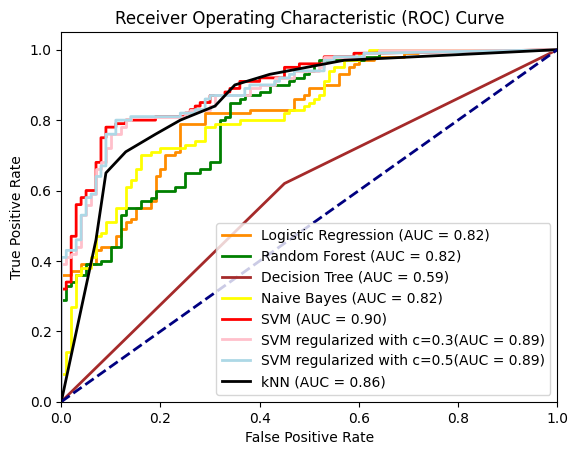

In [71]:
# Plot ROC curve
plt.figure()
plt.plot(kfd_fpr_lr, kfd_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % kfd_roc_auc_lr)
plt.plot(kfd_fpr_rf, kfd_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % kfd_roc_auc_rf)
plt.plot(kfd_fpr_dt, kfd_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % kfd_roc_auc_dt)
plt.plot(kfd_fpr_nb, kfd_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % kfd_roc_auc_nb)
plt.plot(kfd_fpr_svm, kfd_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % kfd_roc_auc_svm)
plt.plot(kfd_fpr_svm2, kfd_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3(AUC = %0.2f)' % kfd_roc_auc_svm2)
plt.plot(kfd_fpr_svm3, kfd_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5(AUC = %0.2f)' % kfd_roc_auc_svm3)
plt.plot(kfd_fpr_knn, kfd_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % kfd_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# EEGNet

In [37]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
import os

In [38]:
batch_size = 32

In [39]:
training_data_control_np = np.load(gen_path_normal)
training_data_patient_np = np.load(gen_path_patient)

labels_control = np.zeros(training_data_control_np.shape[0])  # Label for controls is 0
labels_patient = np.ones(training_data_patient_np.shape[0])   # Label for patients is 1


training_data_np = np.concatenate((training_data_control_np,training_data_patient_np), axis=0)
labels_np = np.concatenate((labels_control, labels_patient), axis=0)

data_tensor = torch.Tensor(training_data_np)
labels_tensor = torch.LongTensor(labels_np)  # Use LongTensor for labels

# Since the discriminator expects flat input, flatten the data if necessary
data_tensor = data_tensor.view(data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
dataset = TensorDataset(data_tensor, labels_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [40]:
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)

val_labels_control = np.zeros(real_data_control.shape[0])  # Label for controls is 0
val_labels_patient = np.ones(real_data_patient.shape[0])   # Label for patients is 1

validation_data_np = np.concatenate((real_data_control,real_data_patient), axis=0)
val_labels_np = np.concatenate((val_labels_control, val_labels_patient), axis=0)

validation_data_tensor = torch.Tensor(validation_data_np)
val_tensor = torch.LongTensor(val_labels_np) #, dtype=torch.float32) #.dtype(torch.float) 

# Since the discriminator expects flat input, flatten the data if necessary
validation_data_tensor = validation_data_tensor.view(validation_data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
validation_dataset = TensorDataset(validation_data_tensor, val_tensor)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)


In [41]:
validation_data_np.shape,val_labels_np.shape

((200, 19, 500), (200,))

In [42]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from modules.EEGNET import EEGNetClassifier

test_validity = True

if not test_validity:
    model = EEGNetClassifier().cuda()
else:
    class SimpleNet(nn.Module):
        def __init__(self, input_channels=1, num_classes=1):
            super(SimpleNet, self).__init__()
            self.fc = nn.Linear(9500, num_classes)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = x.view(x.size(0), -1)
            x = self.fc(x)
            x = self.sigmoid(x)
            return x
    model = SimpleNet().cuda()

In [43]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-6)
bce_loss = nn.BCELoss()
num_epochs = 25 

In [44]:
from tqdm import tqdm

for epoch in (range(num_epochs)):
    pbar = tqdm(train_loader)
    avg_loss=[]
    train_predictions = []
    model.train()
    # val_losses=[]
    # all_predictions = []
    correct = 0
    total = 0
    for batch, labels in pbar:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())


        pred_max = (predictions >= 0.5).squeeze().int()
        train_predictions.extend(pred_max)
        
        # _, predicted = torch.max(train_predictions, 1)
        total += labels.size(0)
        correct += (torch.Tensor(pred_max).cuda() == labels.int()).sum().item()

        pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")

    accuracy = correct / total if total > 0 else 0.0
    print(f"Epoch {epoch} Accuracy: {accuracy * 100:.2f}%")

    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()

            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Val Loss: {sum(val_losses)/len(val_losses)} Val Accuracy: {val_accuracy}\033[0m")
            

Epoch 0 Loss: 0.6769688129425049 : 100%|██████████| 250/250 [00:01<00:00, 224.59it/s]


Epoch 0 Accuracy: 54.64%
Epoch 0 Training Loss: 0.6894477624893188 Val Loss: 0.6838679143360683 Val Accuracy: 0.59


Epoch 1 Loss: 0.6463913917541504 : 100%|██████████| 250/250 [00:00<00:00, 633.14it/s]


Epoch 1 Accuracy: 77.44%
Epoch 1 Training Loss: 0.6636049795150757 Val Loss: 0.6648716160229274 Val Accuracy: 0.78


Epoch 2 Loss: 0.6305649280548096 : 100%|██████████| 250/250 [00:00<00:00, 625.92it/s]


Epoch 2 Accuracy: 90.14%
Epoch 2 Training Loss: 0.6389521157741547 Val Loss: 0.6467103362083435 Val Accuracy: 0.85


Epoch 3 Loss: 0.5946663022041321 : 100%|██████████| 250/250 [00:00<00:00, 645.49it/s]


Epoch 3 Accuracy: 95.62%
Epoch 3 Training Loss: 0.6154223382472992 Val Loss: 0.6318227563585553 Val Accuracy: 0.88


Epoch 4 Loss: 0.6059350967407227 : 100%|██████████| 250/250 [00:00<00:00, 628.29it/s]


Epoch 4 Accuracy: 97.82%
Epoch 4 Training Loss: 0.592950612783432 Val Loss: 0.6126978141920907 Val Accuracy: 0.925


Epoch 5 Loss: 0.5470678806304932 : 100%|██████████| 250/250 [00:00<00:00, 622.74it/s]


Epoch 5 Accuracy: 98.85%
Epoch 5 Training Loss: 0.5714793992042542 Val Loss: 0.5980294091360909 Val Accuracy: 0.955


Epoch 6 Loss: 0.5357385873794556 : 100%|██████████| 250/250 [00:00<00:00, 658.00it/s]


Epoch 6 Accuracy: 99.30%
Epoch 6 Training Loss: 0.5509429063796997 Val Loss: 0.5803230319704328 Val Accuracy: 0.975


Epoch 7 Loss: 0.5212980508804321 : 100%|██████████| 250/250 [00:00<00:00, 647.51it/s] 


Epoch 7 Accuracy: 99.58%
Epoch 7 Training Loss: 0.531306742310524 Val Loss: 0.5660244567053658 Val Accuracy: 0.985


Epoch 8 Loss: 0.5047928094863892 : 100%|██████████| 250/250 [00:00<00:00, 650.36it/s] 


Epoch 8 Accuracy: 99.66%
Epoch 8 Training Loss: 0.512521976351738 Val Loss: 0.5502652696200779 Val Accuracy: 0.985


Epoch 9 Loss: 0.46118515729904175 : 100%|██████████| 250/250 [00:00<00:00, 651.98it/s]


Epoch 9 Accuracy: 99.78%
Epoch 9 Training Loss: 0.49454809081554413 Val Loss: 0.535475492477417 Val Accuracy: 0.99


Epoch 10 Loss: 0.4725293219089508 : 100%|██████████| 250/250 [00:00<00:00, 659.00it/s] 


Epoch 10 Accuracy: 99.79%
Epoch 10 Training Loss: 0.4773394066095352 Val Loss: 0.5233202661786761 Val Accuracy: 0.99


Epoch 11 Loss: 0.46299371123313904 : 100%|██████████| 250/250 [00:00<00:00, 598.81it/s]


Epoch 11 Accuracy: 99.81%
Epoch 11 Training Loss: 0.4608451318740845 Val Loss: 0.5106450234140668 Val Accuracy: 0.99


Epoch 12 Loss: 0.4287140667438507 : 100%|██████████| 250/250 [00:00<00:00, 569.16it/s] 


Epoch 12 Accuracy: 99.85%
Epoch 12 Training Loss: 0.4450369242429733 Val Loss: 0.4928227365016937 Val Accuracy: 0.99


Epoch 13 Loss: 0.4253249168395996 : 100%|██████████| 250/250 [00:00<00:00, 504.22it/s] 


Epoch 13 Accuracy: 99.88%
Epoch 13 Training Loss: 0.42987147510051726 Val Loss: 0.4858733117580414 Val Accuracy: 0.99


Epoch 14 Loss: 0.42565402388572693 : 100%|██████████| 250/250 [00:00<00:00, 558.00it/s]


Epoch 14 Accuracy: 99.89%
Epoch 14 Training Loss: 0.4153227344751358 Val Loss: 0.46703700508390156 Val Accuracy: 0.99


Epoch 15 Loss: 0.38175103068351746 : 100%|██████████| 250/250 [00:00<00:00, 586.02it/s]


Epoch 15 Accuracy: 99.90%
Epoch 15 Training Loss: 0.4013566334247589 Val Loss: 0.46033863936151775 Val Accuracy: 0.995


Epoch 16 Loss: 0.38379546999931335 : 100%|██████████| 250/250 [00:00<00:00, 586.83it/s]


Epoch 16 Accuracy: 99.90%
Epoch 16 Training Loss: 0.3879528393745422 Val Loss: 0.4466969200542995 Val Accuracy: 0.995


Epoch 17 Loss: 0.379554808139801 : 100%|██████████| 250/250 [00:00<00:00, 591.44it/s]  


Epoch 17 Accuracy: 99.90%
Epoch 17 Training Loss: 0.3750838228464127 Val Loss: 0.43594368015016827 Val Accuracy: 0.995


Epoch 18 Loss: 0.34947872161865234 : 100%|██████████| 250/250 [00:00<00:00, 585.40it/s]


Epoch 18 Accuracy: 99.91%
Epoch 18 Training Loss: 0.3627277854681015 Val Loss: 0.42580160924366545 Val Accuracy: 1.0


Epoch 19 Loss: 0.36226534843444824 : 100%|██████████| 250/250 [00:00<00:00, 575.22it/s]


Epoch 19 Accuracy: 99.91%
Epoch 19 Training Loss: 0.3508550193309784 Val Loss: 0.41810306906700134 Val Accuracy: 1.0


Epoch 20 Loss: 0.3641055226325989 : 100%|██████████| 250/250 [00:00<00:00, 566.62it/s] 


Epoch 20 Accuracy: 99.91%
Epoch 20 Training Loss: 0.33945369529724123 Val Loss: 0.4100967986243112 Val Accuracy: 1.0


Epoch 21 Loss: 0.33593714237213135 : 100%|██████████| 250/250 [00:00<00:00, 575.58it/s]


Epoch 21 Accuracy: 99.91%
Epoch 21 Training Loss: 0.328506113409996 Val Loss: 0.40021898065294537 Val Accuracy: 1.0


Epoch 22 Loss: 0.3015057444572449 : 100%|██████████| 250/250 [00:00<00:00, 574.59it/s] 


Epoch 22 Accuracy: 99.92%
Epoch 22 Training Loss: 0.31797913575172426 Val Loss: 0.3893819749355316 Val Accuracy: 1.0


Epoch 23 Loss: 0.29969990253448486 : 100%|██████████| 250/250 [00:00<00:00, 562.26it/s]


Epoch 23 Accuracy: 99.92%
Epoch 23 Training Loss: 0.3078587062358856 Val Loss: 0.37050447293690275 Val Accuracy: 1.0


Epoch 24 Loss: 0.2820032835006714 : 100%|██████████| 250/250 [00:00<00:00, 571.87it/s] 


Epoch 24 Accuracy: 99.92%
Epoch 24 Training Loss: 0.2981251775622368 Val Loss: 0.36677010144506184 Val Accuracy: 1.0


Epoch 25 Loss: 0.3235290050506592 : 100%|██████████| 250/250 [00:00<00:00, 567.31it/s] 


Epoch 25 Accuracy: 99.92%
Epoch 25 Training Loss: 0.2887616647481918 Val Loss: 0.35545383180890766 Val Accuracy: 1.0


Epoch 26 Loss: 0.28874877095222473 : 100%|██████████| 250/250 [00:00<00:00, 579.99it/s]


Epoch 26 Accuracy: 99.92%
Epoch 26 Training Loss: 0.2797564728856087 Val Loss: 0.35459050110408236 Val Accuracy: 1.0


Epoch 27 Loss: 0.25022438168525696 : 100%|██████████| 250/250 [00:00<00:00, 578.65it/s]


Epoch 27 Accuracy: 99.92%
Epoch 27 Training Loss: 0.2710945633649826 Val Loss: 0.3421080878802708 Val Accuracy: 1.0


Epoch 28 Loss: 0.26482245326042175 : 100%|██████████| 250/250 [00:00<00:00, 507.52it/s]


Epoch 28 Accuracy: 99.92%
Epoch 28 Training Loss: 0.2627615453004837 Val Loss: 0.32816535234451294 Val Accuracy: 1.0


Epoch 29 Loss: 0.23176617920398712 : 100%|██████████| 250/250 [00:00<00:00, 563.46it/s]


Epoch 29 Accuracy: 99.94%
Epoch 29 Training Loss: 0.25474577212333677 Val Loss: 0.3224003187247685 Val Accuracy: 1.0


Epoch 30 Loss: 0.23951533436775208 : 100%|██████████| 250/250 [00:00<00:00, 562.94it/s]


Epoch 30 Accuracy: 99.94%
Epoch 30 Training Loss: 0.24703111523389817 Val Loss: 0.31389044863837107 Val Accuracy: 1.0


Epoch 31 Loss: 0.24916546046733856 : 100%|██████████| 250/250 [00:00<00:00, 558.53it/s]


Epoch 31 Accuracy: 99.94%
Epoch 31 Training Loss: 0.23960249865055083 Val Loss: 0.3054133653640747 Val Accuracy: 1.0


Epoch 32 Loss: 0.23912763595581055 : 100%|██████████| 250/250 [00:00<00:00, 569.14it/s]


Epoch 32 Accuracy: 99.95%
Epoch 32 Training Loss: 0.23244983941316605 Val Loss: 0.2990532560007913 Val Accuracy: 1.0


Epoch 33 Loss: 0.21959424018859863 : 100%|██████████| 250/250 [00:00<00:00, 560.34it/s]


Epoch 33 Accuracy: 99.95%
Epoch 33 Training Loss: 0.22556651681661605 Val Loss: 0.2942698768207005 Val Accuracy: 1.0


Epoch 34 Loss: 0.19299405813217163 : 100%|██████████| 250/250 [00:00<00:00, 542.17it/s]


Epoch 34 Accuracy: 99.95%
Epoch 34 Training Loss: 0.21893958193063737 Val Loss: 0.2850233955042703 Val Accuracy: 1.0


Epoch 35 Loss: 0.2522711157798767 : 100%|██████████| 250/250 [00:00<00:00, 570.65it/s] 


Epoch 35 Accuracy: 99.95%
Epoch 35 Training Loss: 0.2125550097823143 Val Loss: 0.28240656426974703 Val Accuracy: 1.0


Epoch 36 Loss: 0.19871190190315247 : 100%|██████████| 250/250 [00:00<00:00, 569.27it/s]


Epoch 36 Accuracy: 99.95%
Epoch 36 Training Loss: 0.20640590107440948 Val Loss: 0.2708418795040676 Val Accuracy: 1.0


Epoch 37 Loss: 0.20781835913658142 : 100%|██████████| 250/250 [00:00<00:00, 561.03it/s]


Epoch 37 Accuracy: 99.95%
Epoch 37 Training Loss: 0.200483542740345 Val Loss: 0.26417816962514606 Val Accuracy: 1.0


Epoch 38 Loss: 0.22100669145584106 : 100%|██████████| 250/250 [00:00<00:00, 560.41it/s]


Epoch 38 Accuracy: 99.95%
Epoch 38 Training Loss: 0.19477700215578078 Val Loss: 0.2567128198487418 Val Accuracy: 1.0


Epoch 39 Loss: 0.15480099618434906 : 100%|██████████| 250/250 [00:00<00:00, 551.03it/s]


Epoch 39 Accuracy: 99.95%
Epoch 39 Training Loss: 0.18927636724710464 Val Loss: 0.25235485817704884 Val Accuracy: 1.0


Epoch 40 Loss: 0.15932558476924896 : 100%|██████████| 250/250 [00:00<00:00, 561.01it/s]


Epoch 40 Accuracy: 99.95%
Epoch 40 Training Loss: 0.18397347593307495 Val Loss: 0.25198603102139067 Val Accuracy: 1.0


Epoch 41 Loss: 0.19612139463424683 : 100%|██████████| 250/250 [00:00<00:00, 554.23it/s]


Epoch 41 Accuracy: 99.95%
Epoch 41 Training Loss: 0.17885801273584365 Val Loss: 0.2369918269770486 Val Accuracy: 1.0


Epoch 42 Loss: 0.20005476474761963 : 100%|██████████| 250/250 [00:00<00:00, 568.70it/s]


Epoch 42 Accuracy: 99.95%
Epoch 42 Training Loss: 0.17392440557479857 Val Loss: 0.2344385108777455 Val Accuracy: 1.0


Epoch 43 Loss: 0.15535780787467957 : 100%|██████████| 250/250 [00:00<00:00, 510.56it/s]


Epoch 43 Accuracy: 99.95%
Epoch 43 Training Loss: 0.16916430366039276 Val Loss: 0.23317283179078782 Val Accuracy: 1.0


Epoch 44 Loss: 0.17390874028205872 : 100%|██████████| 250/250 [00:00<00:00, 573.15it/s]


Epoch 44 Accuracy: 99.95%
Epoch 44 Training Loss: 0.1645742303133011 Val Loss: 0.22610968138490403 Val Accuracy: 1.0


Epoch 45 Loss: 0.12690776586532593 : 100%|██████████| 250/250 [00:00<00:00, 557.25it/s]


Epoch 45 Accuracy: 99.95%
Epoch 45 Training Loss: 0.1601480566561222 Val Loss: 0.21562149482113974 Val Accuracy: 1.0


Epoch 46 Loss: 0.13338464498519897 : 100%|██████████| 250/250 [00:00<00:00, 564.22it/s]


Epoch 46 Accuracy: 99.95%
Epoch 46 Training Loss: 0.15587431240081787 Val Loss: 0.21427067475659506 Val Accuracy: 1.0


Epoch 47 Loss: 0.14244061708450317 : 100%|██████████| 250/250 [00:00<00:00, 568.60it/s]


Epoch 47 Accuracy: 99.95%
Epoch 47 Training Loss: 0.15174809443950654 Val Loss: 0.20918491695608413 Val Accuracy: 1.0


Epoch 48 Loss: 0.11926702409982681 : 100%|██████████| 250/250 [00:00<00:00, 543.39it/s]


Epoch 48 Accuracy: 99.95%
Epoch 48 Training Loss: 0.1477639162540436 Val Loss: 0.20056834604058946 Val Accuracy: 1.0


Epoch 49 Loss: 0.17757189273834229 : 100%|██████████| 250/250 [00:00<00:00, 558.51it/s]

Epoch 49 Accuracy: 99.95%
Epoch 49 Training Loss: 0.14391764226555825 Val Loss: 0.2002673830304827 Val Accuracy: 1.0


In [45]:
import pandas as pd

In [46]:
actual_labels = []
predicted_probabilities = []
with torch.no_grad():
    for batch in val_loader:
        inputs, labels = batch
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        predicted = torch.where(outputs > 0.5, 1, 0)
        actual_labels.extend(labels.cpu().numpy())
        predicted_probabilities.extend(predicted.cpu().numpy())
predicted_probabilities = np.concatenate(predicted_probabilities)
# Create a confusion matrix
conf_mat = pd.crosstab(actual_labels, predicted_probabilities, rownames=['Actual'], colnames=['Predicted'])

print(conf_mat)

Predicted    0    1
Actual             
0          100    0
1            0  100


In [47]:
predicted_probabilities[0], actual_labels[0]

(0, 0)

# EEGNet Real and Gen Discrimination

In [83]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split

In [84]:
batch_size = 32

In [85]:
##
# Load Generated data and combine it
## 
gen_data_control_np = np.load(gen_path_normal)[0:100]
gen_data_patient_np = np.load(gen_path_patient)[0:100]
gen_data_np = np.concatenate((gen_data_control_np, gen_data_patient_np), axis=0)
gen_labels = np.zeros(gen_data_np.shape[0])  # Label for controls is 0

##
# Load real data and combine it
##
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)
real_data_np = np.concatenate((real_data_control, real_data_patient), axis=0)
real_labels = np.ones(real_data_np.shape[0])   # Label for patients is 1

# combine real and generated data
dataset = np.concatenate((gen_data_np,real_data_np), axis=0)
labels_dataset = np.concatenate((gen_labels,real_labels), axis=0)

train_data, val_data, train_labels, val_labels = train_test_split(
    dataset, labels_dataset, test_size=0.2, random_state=42, stratify=labels_dataset
)

# Convert data to tensors
train_data_tensor = torch.Tensor(train_data)
train_labels_tensor = torch.LongTensor(train_labels)
val_data_tensor = torch.Tensor(val_data)
val_labels_tensor = torch.LongTensor(val_labels)

# Reshape to the expected input format
train_data_tensor = train_data_tensor.view(train_data_tensor.size(0), 1, 19, 500)
val_data_tensor = val_data_tensor.view(val_data_tensor.size(0), 1, 19, 500)

# Create TensorDatasets
train_tensor_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
val_tensor_dataset = TensorDataset(val_data_tensor, val_labels_tensor)

# Create DataLoaders
batch_size = 32  # Example batch size; modify as needed
train_loader = DataLoader(train_tensor_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_tensor_dataset, batch_size=batch_size, shuffle=False)

In [86]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from modules.EEGNET import EEGNetClassifier
model = EEGNetClassifier().cuda()

In [87]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 25

In [88]:
from tqdm import tqdm
highest_val_acc = -np.inf

for epoch in tqdm(range(num_epochs)):
    # pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    correct = 0
    total = 0
    for batch, labels in train_loader:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        pred_calc = (predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
        correct += (pred_calc == labels.int()).sum().item()
        total += labels.size(0)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())
        # val_losses.append(val_loss.item())
        # pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")

    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    if val_accuracy > highest_val_acc:
        highest_val_acc=val_accuracy
    # accuracy = correct / total if total > 0 else 0.0
print(highest_val_acc)
# print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Validation Loss: {sum(val_losses)/len(val_losses)} Training Accuracy: {accuracy} Validation Accuracy: {val_accuracy}\033[0m")

100%|██████████| 25/25 [00:00<00:00, 29.90it/s]

0.5625


In [89]:
import pandas as pd

In [90]:
actual_labels = []
predicted_probabilities = []
with torch.no_grad():
    for batch in val_loader:
        inputs, labels = batch
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        predicted = torch.where(outputs > 0.5, 1, 0)
        actual_labels.extend(labels.cpu().numpy())
        predicted_probabilities.extend(predicted.cpu().numpy())
predicted_probabilities = np.concatenate(predicted_probabilities)
# Create a confusion matrix
conf_mat = pd.crosstab(actual_labels, predicted_probabilities, rownames=['Actual'], colnames=['Predicted'])
print("0:Generated\t\t1: Real")
print(conf_mat)

0:Generated		1: Real
Predicted   0   1
Actual           
0          27  13
1          26  14
